In [ ]:
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d_types = {'date':str, 'quarter':str, 'department':str, 'day':str, 'team':int,
           'targeted_productivity':float, 'smv':float, 'wip':float, 'over_time':int,
           'incentive':int, 'idle_time':float, 'idle_men':int, 'no_of_style_change':int,
           'no_of_workers':float, 'actual_productivity':float}

df = pd.read_csv("garments_worker_productivity.csv", sep=',', dtype=d_types)
df = df.drop(columns='date')
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float("inf")]
df['productivity_labels'] = pd.cut(df['actual_productivity']*100, bins)

df.productivity_labels.unique()

[(90.0, inf], (80.0, 90.0], (70.0, 80.0], (60.0, 70.0], (50.0, 60.0], (40.0, 50.0], (30.0, 40.0], (20.0, 30.0]]
Categories (8, interval[float64]): [(20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] <
                                    (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0] < (90.0, inf]]

In [ ]:
df.drop(columns=['team']).describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Preprocesssing

## Blank value in department

there is a blank value in finishing to delete with the trim function

In [ ]:
df.department.unique()
df['department'] = df['department'].astype('str').apply(lambda x: x.strip())
df.department.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   object  
 1   department             1197 non-null   object  
 2   day                    1197 non-null   object  
 3   team                   1197 non-null   int64   
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    691 non-null    float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
 14  productivity_labels    1197 non-null   c

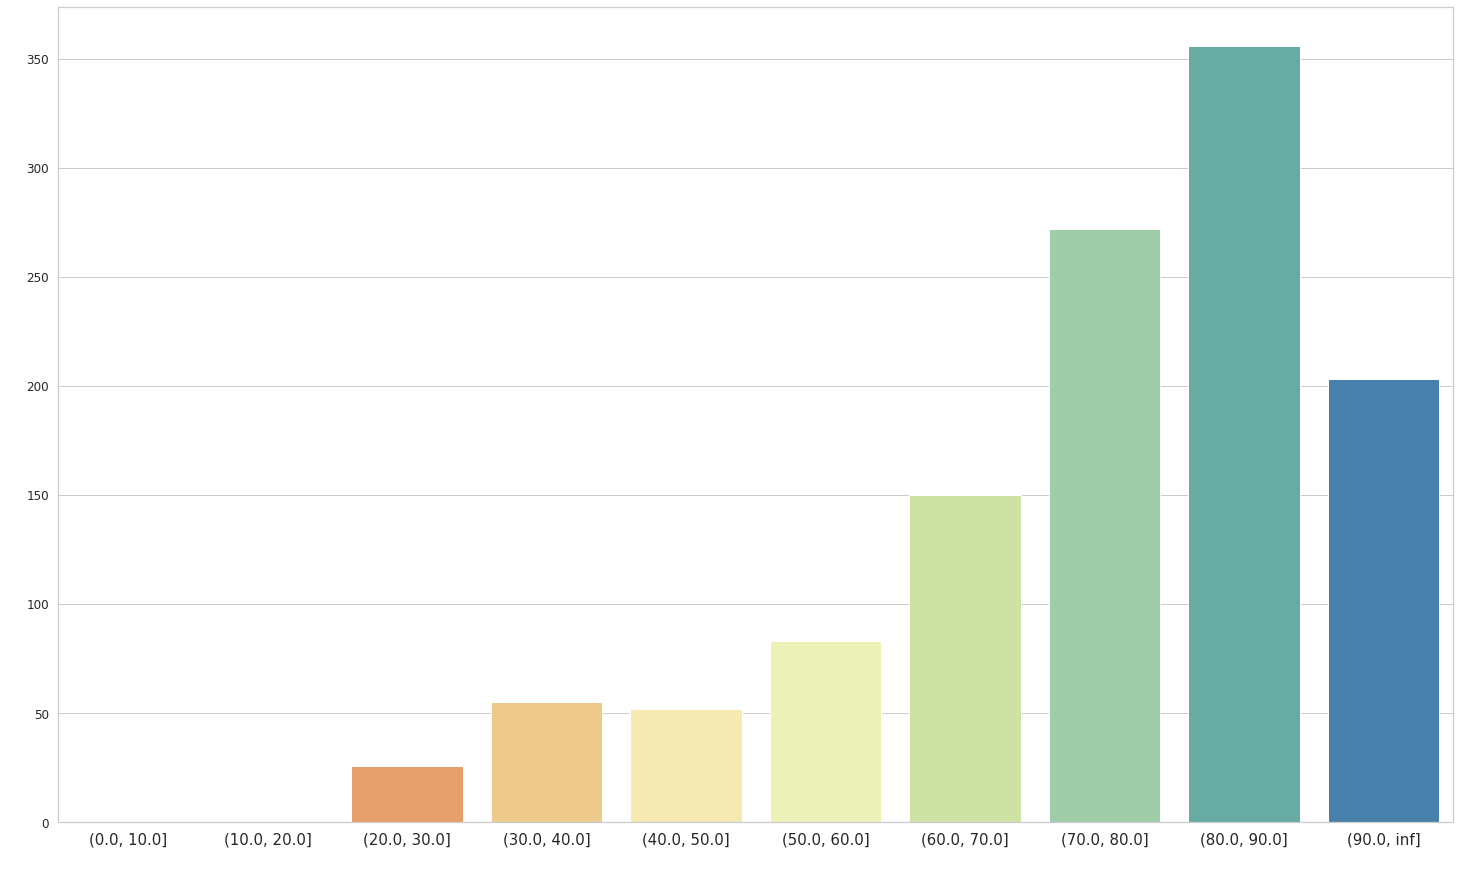

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,15))
ax = sns.countplot(x="productivity_labels", data=df, palette = "Spectral")
plt.ylabel(' ', fontsize=16)
plt.xlabel(' ', fontsize=19)
plt.xticks(size=15)
plt.yticks(size=12)
plt.show()

## Quarter - productivity labels relation

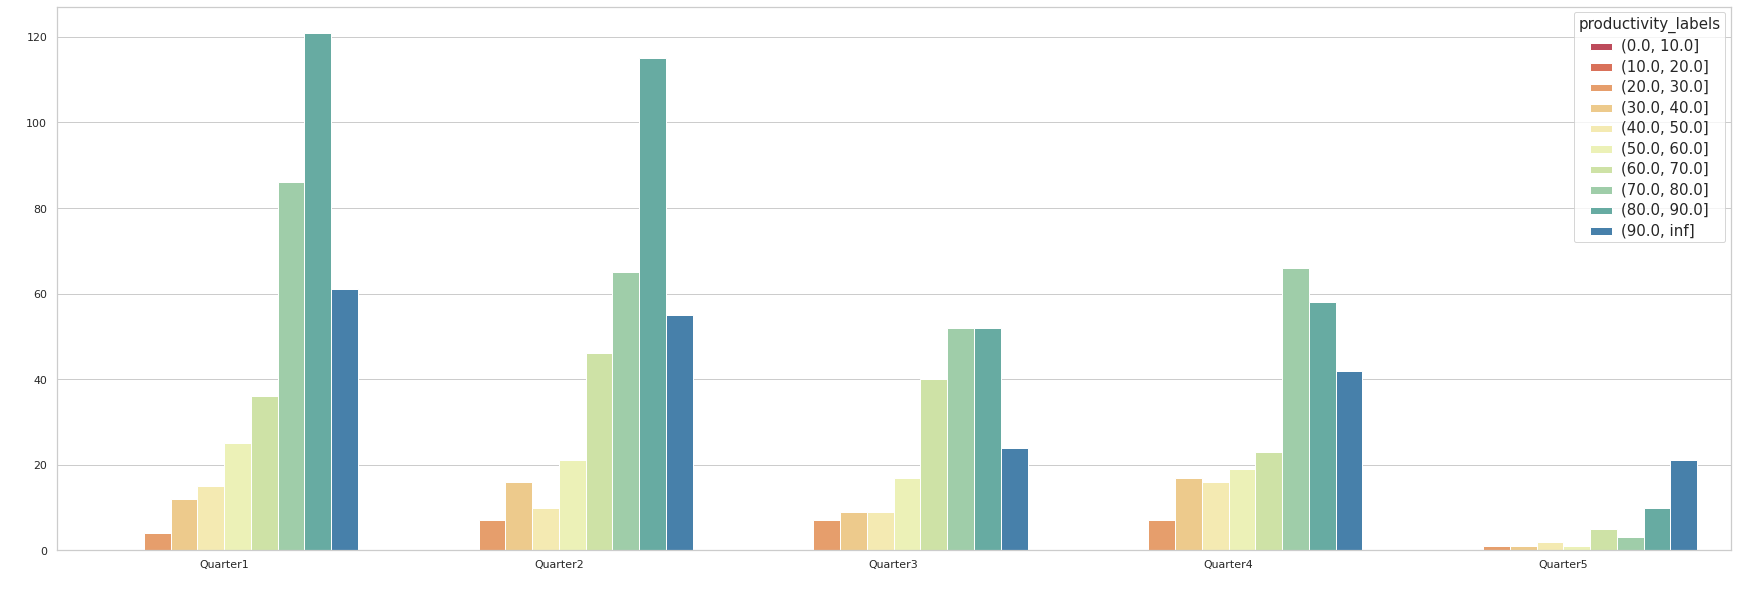

In [ ]:
fig, (ax1)= plt.subplots(1,1, figsize=(30,10))
sns.set(style="whitegrid")
sns.countplot(x="quarter", data=df, hue="productivity_labels", palette = "Spectral", ax=ax1)
sns.set(font_scale = 2)
plt.setp(ax1.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='15') # for legend title
ax1.set_xlabel(" ") 
ax1.set_ylabel(' ', fontsize=16)
ax1.set_xlabel(' ', fontsize=16)
plt.show()

## Department - productivity labels relation

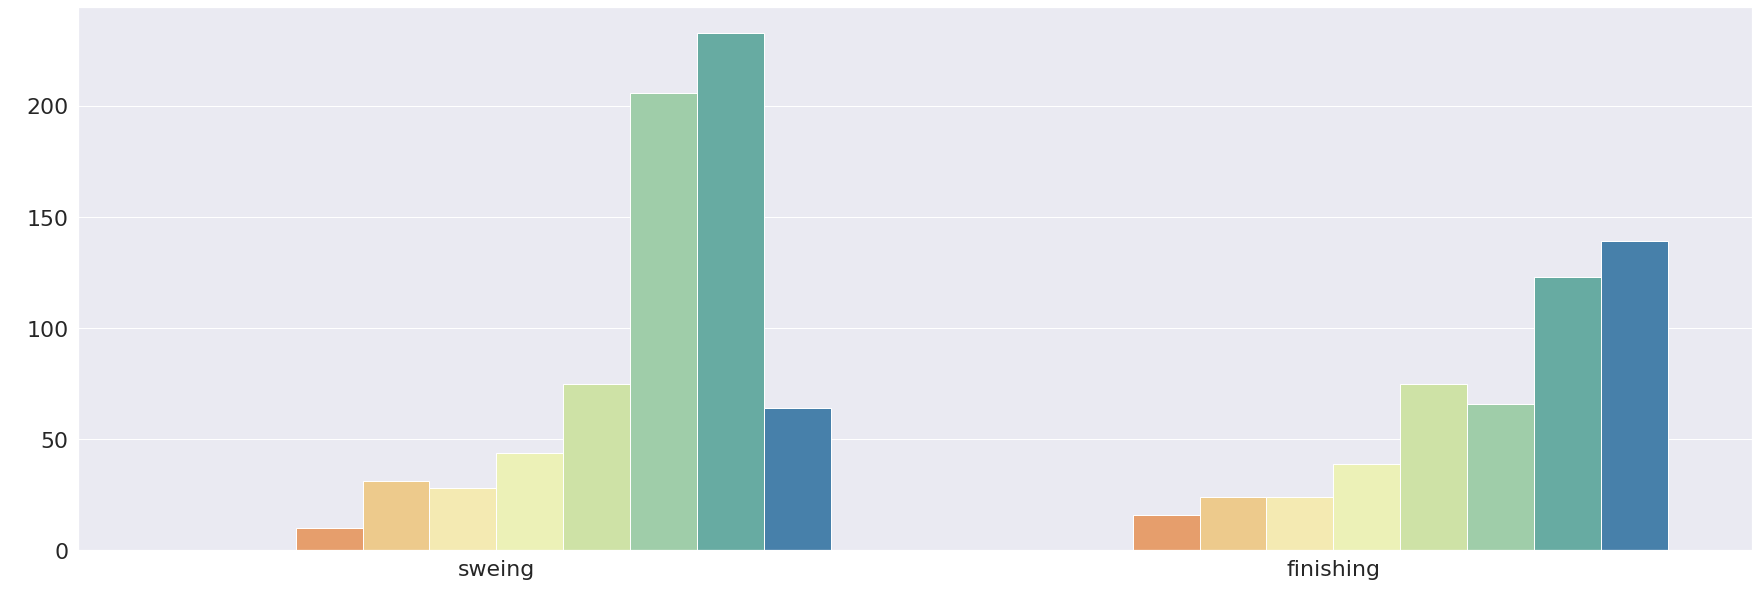

In [ ]:
fig, (ax1)= plt.subplots(1,1, figsize=(30,10))
sns.set(style="whitegrid")
sns.countplot(x="department", data=df, hue="productivity_labels", palette = "Spectral", ax=ax1)
sns.set(font_scale = 2)
ax1.legend().remove()
ax1.set_ylabel(' ', fontsize=16)
ax1.set_xlabel(' ', fontsize=16)
plt.show()

## Day - productivity relation

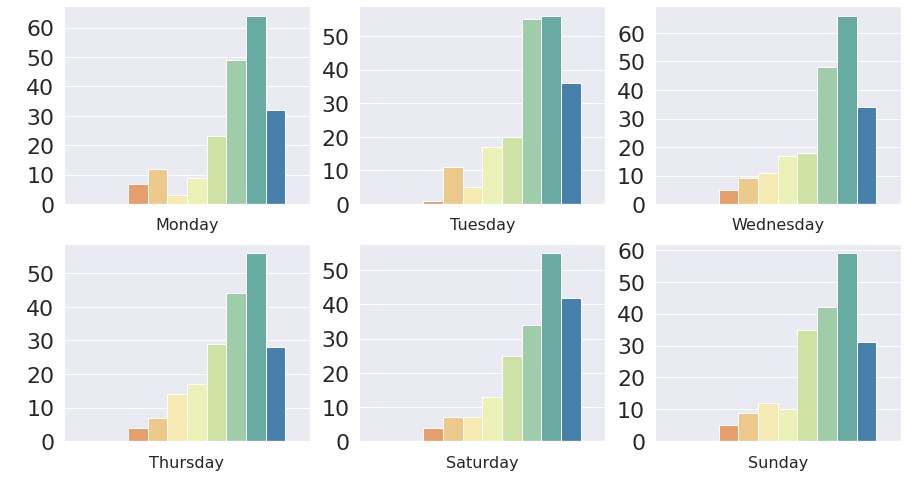

In [ ]:
# Friday is not present

fig, ( (ax1, ax2,ax3), (ax4, ax5, ax6) )= plt.subplots(2,3,figsize=(15,8))
sns.set(style="whitegrid")

# Monday
is_Monday = df['day']=='Monday'
ax = sns.countplot(x="day", data=df[is_Monday], hue="productivity_labels", palette = "Spectral", ax=ax1)
ax1.legend().remove()
ax1.set(xticklabels=[])
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Monday", fontsize=16) 

# Tuesday
is_Tuesday = df['day']=='Tuesday'
ax = sns.countplot(x="day", data=df[is_Tuesday], hue="productivity_labels", palette = "Spectral", ax=ax2)
ax2.legend().remove()
ax2.set(xticklabels=[])
ax2.set_ylabel(" ", fontsize=16) 
ax2.set_xlabel("Tuesday", fontsize=16) 

# Wednesday
is_Wednesday = df['day']=='Wednesday'
ax = sns.countplot(x="day", data=df[is_Wednesday], hue="productivity_labels", palette = "Spectral", ax=ax3)
ax3.legend().remove()
ax3.set(xticklabels=[])
ax3.set_ylabel(" ", fontsize=16) 
ax3.set_xlabel("Wednesday", fontsize=16) 

# Thursday
is_Thursday = df['day']=='Thursday'
ax = sns.countplot(x="day", data=df[is_Thursday], hue="productivity_labels", palette = "Spectral", ax=ax4)
ax4.legend().remove()
ax4.set(xticklabels=[])
ax4.set_ylabel(" ", fontsize=16) 
ax4.set_xlabel("Thursday", fontsize=16) 

# Saturday
is_Saturday = df['day']=='Saturday'
ax = sns.countplot(x="day", data=df[is_Saturday], hue="productivity_labels", palette = "Spectral", ax=ax5)
ax5.legend().remove()
ax5.set(xticklabels=[])
ax5.set_ylabel(" ", fontsize=16) 
ax5.set_xlabel("Saturday", fontsize=16) 

# Sunday
is_Sunday = df['day']=='Sunday'
ax = sns.countplot(x="day", data=df[is_Sunday], hue="productivity_labels", palette = "Spectral", ax=ax6)
ax6.legend().remove()
ax6.set(xticklabels=[])
ax6.set_ylabel(" ", fontsize=16) 
ax6.set_xlabel("Sunday", fontsize=16) 

plt.show()

## Team - productivity labels relation

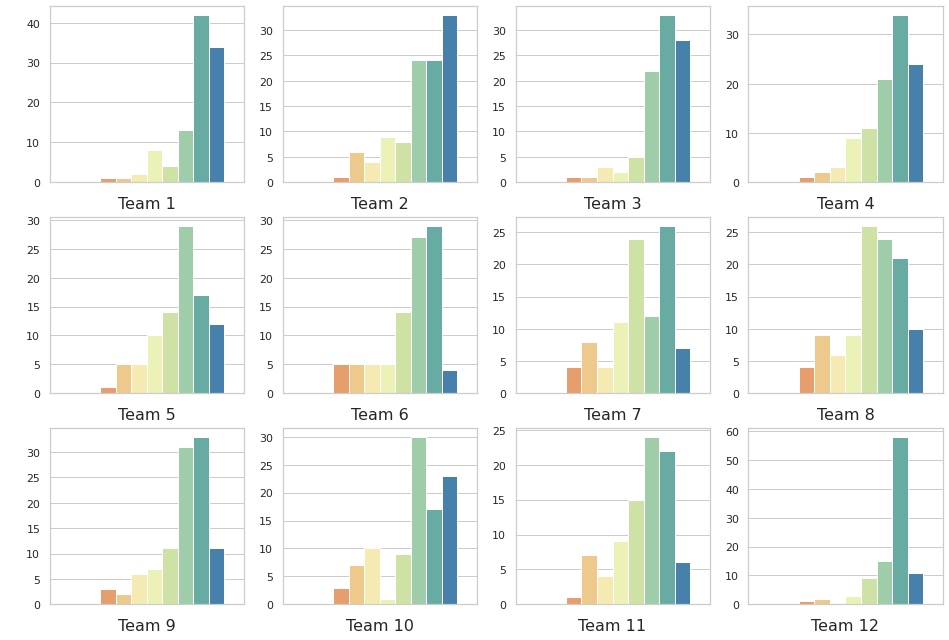

In [ ]:
fig, ((ax1, ax2,ax3, ax4),( ax5,ax6, ax7, ax8 ), ( ax9,ax10, ax11, ax12) )= plt.subplots(3,4,figsize=(16,11))
sns.set(style="whitegrid")

# Team 1
is_team1 = df['team']==1
ax = sns.countplot(x="team", data=df[is_team1], hue="productivity_labels", palette = "Spectral", ax=ax1)
ax1.legend().remove()
ax1.set(xticklabels=[])
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Team 1", fontsize=16) 

# Team 2
is_team2 = df['team']==2
ax = sns.countplot(x="team", data=df[is_team2], hue="productivity_labels", palette = "Spectral", ax=ax2)
ax2.legend().remove()
ax2.set(xticklabels=[])
ax2.set_ylabel(" ", fontsize=16) 
ax2.set_xlabel("Team 2", fontsize=16) 

# Team 3
is_team3 = df['team']==3
ax = sns.countplot(x="team", data=df[is_team3], hue="productivity_labels", palette = "Spectral", ax=ax3)
ax3.legend().remove()
ax3.set(xticklabels=[])
ax3.set_ylabel(" ", fontsize=16) 
ax3.set_xlabel("Team 3", fontsize=16) 

# Team 4
is_team4 = df['team']==4
ax = sns.countplot(x="team", data=df[is_team4], hue="productivity_labels", palette = "Spectral", ax=ax4)
ax4.legend().remove()
ax4.set(xticklabels=[])
ax4.set_ylabel(" ", fontsize=16) 
ax4.set_xlabel("Team 4", fontsize=16) 

# Team 5
is_team5 = df['team']==5
ax = sns.countplot(x="team", data=df[is_team5], hue="productivity_labels", palette = "Spectral", ax=ax5)
ax5.legend().remove()
ax5.set(xticklabels=[])
ax5.set_ylabel(" ", fontsize=16) 
ax5.set_xlabel("Team 5", fontsize=16) 

# Team 6
is_team6 = df['team']==6
ax = sns.countplot(x="team", data=df[is_team6], hue="productivity_labels", palette = "Spectral", ax=ax6)
ax6.legend().remove()
ax6.set(xticklabels=[])
ax6.set_ylabel(" ", fontsize=16) 
ax6.set_xlabel("Team 6", fontsize=16) 

# Team 7
is_team7 = df['team']==7
ax = sns.countplot(x="team", data=df[is_team7], hue="productivity_labels", palette = "Spectral", ax=ax7)
ax7.legend().remove()
ax7.set(xticklabels=[])
ax7.set_ylabel(" ", fontsize=16) 
ax7.set_xlabel("Team 7", fontsize=16) 

# Team 8
is_team8 = df['team']==8
ax = sns.countplot(x="team", data=df[is_team8], hue="productivity_labels", palette = "Spectral", ax=ax8)
ax8.legend().remove()
ax8.set(xticklabels=[])
ax8.set_ylabel(" ", fontsize=16) 
ax8.set_xlabel("Team 8", fontsize=16) 

# Team 9
is_team9 = df['team']==9
ax = sns.countplot(x="team", data=df[is_team9], hue="productivity_labels", palette = "Spectral", ax=ax9)
ax9.legend().remove()
ax9.set(xticklabels=[])
ax9.set_ylabel(" ", fontsize=16) 
ax9.set_xlabel("Team 9", fontsize=16) 

# Team 10
is_team10 = df['team']==10
ax = sns.countplot(x="team", data=df[is_team10], hue="productivity_labels", palette = "Spectral", ax=ax10)
ax10.legend().remove()
ax10.set(xticklabels=[])
ax10.set_ylabel(" ", fontsize=16) 
ax10.set_xlabel("Team 10", fontsize=16) 

# Team 11
is_team11 = df['team']==11
ax = sns.countplot(x="team", data=df[is_team11], hue="productivity_labels", palette = "Spectral", ax=ax11)
ax11.legend().remove()
ax11.set(xticklabels=[])
ax11.set_ylabel(" ", fontsize=16) 
ax11.set_xlabel("Team 11", fontsize=16) 

# Team 12
is_team12 = df['team']==12
ax = sns.countplot(x="team", data=df[is_team12], hue="productivity_labels", palette = "Spectral", ax=ax12)
ax12.legend().remove()
ax12.set(xticklabels=[])
ax12.set_ylabel(" ", fontsize=16) 
ax12.set_xlabel("Team 12", fontsize=16) 

plt.show()

## Targeted productivity - productivity labels relation

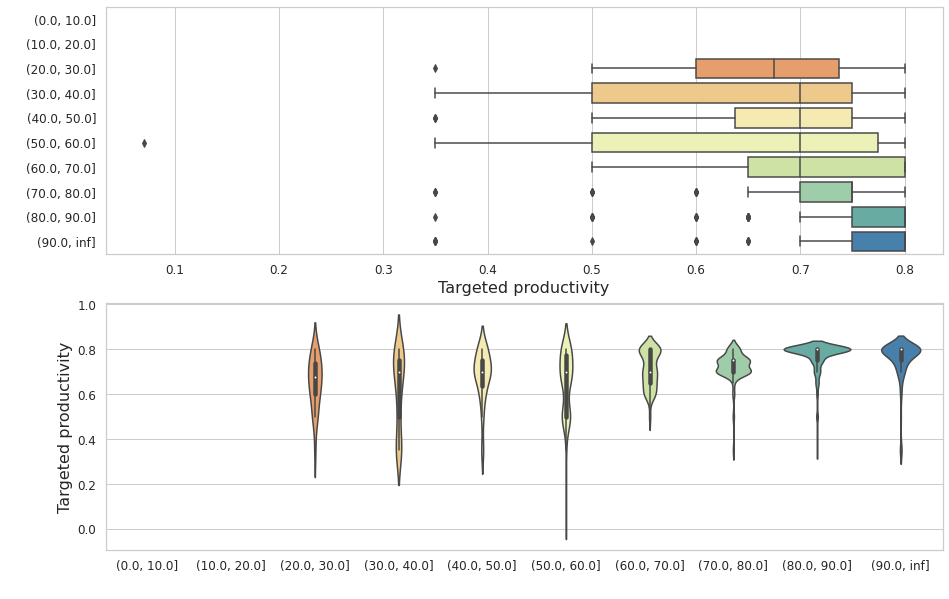

In [ ]:
fig, ((ax1, ax2))= plt.subplots(2,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="targeted_productivity",
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Targeted productivity", fontsize=16) 
ax1.tick_params(labelsize=12)
sns.violinplot(x="productivity_labels",y="targeted_productivity",
             palette = "Spectral",
            data=df, ax = ax2)
ax2.set_xlabel(" ", fontsize=16) 
ax2.set_ylabel("Targeted productivity", fontsize=16) 
ax2.tick_params(labelsize=12)

plt.show()

## Standard minute value - Productivity relation

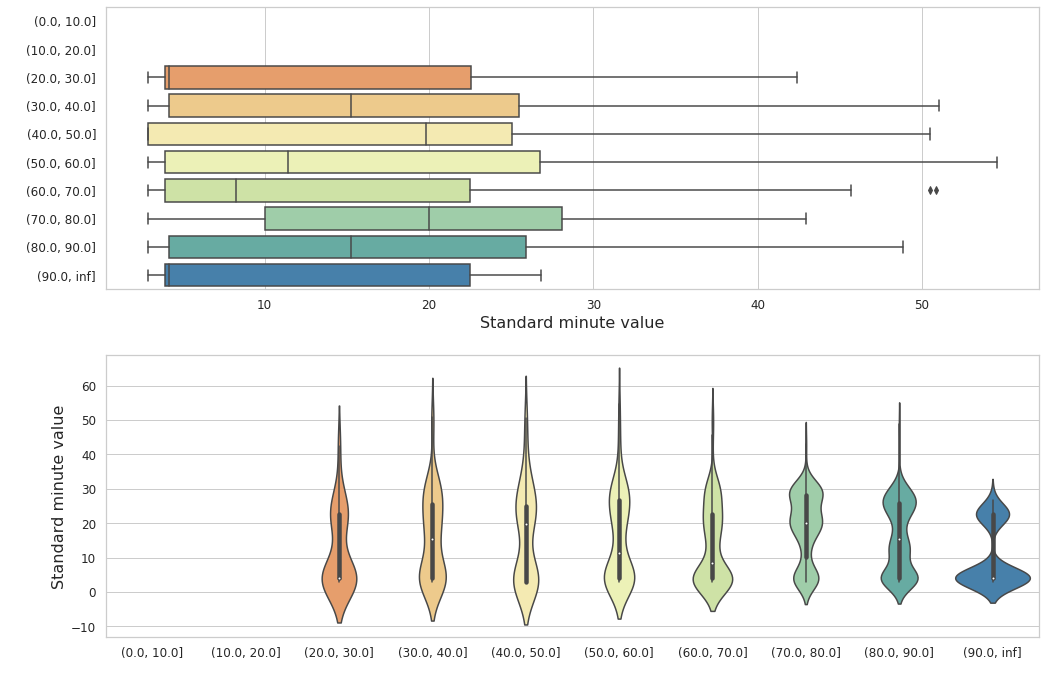

In [ ]:
fig, (ax1, ax2)= plt.subplots(2,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="smv",
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Standard minute value", fontsize=16) 
ax1.tick_params(labelsize=12)
sns.violinplot(x="productivity_labels",y="smv",
             palette = "Spectral",
            data=df, ax = ax2)
ax2.set_xlabel(" ", fontsize=16) 
ax2.set_ylabel("Standard minute value", fontsize=16) 
ax2.tick_params(labelsize=12)
fig.tight_layout(pad=2.0)

plt.show()

## Wip - Productivity

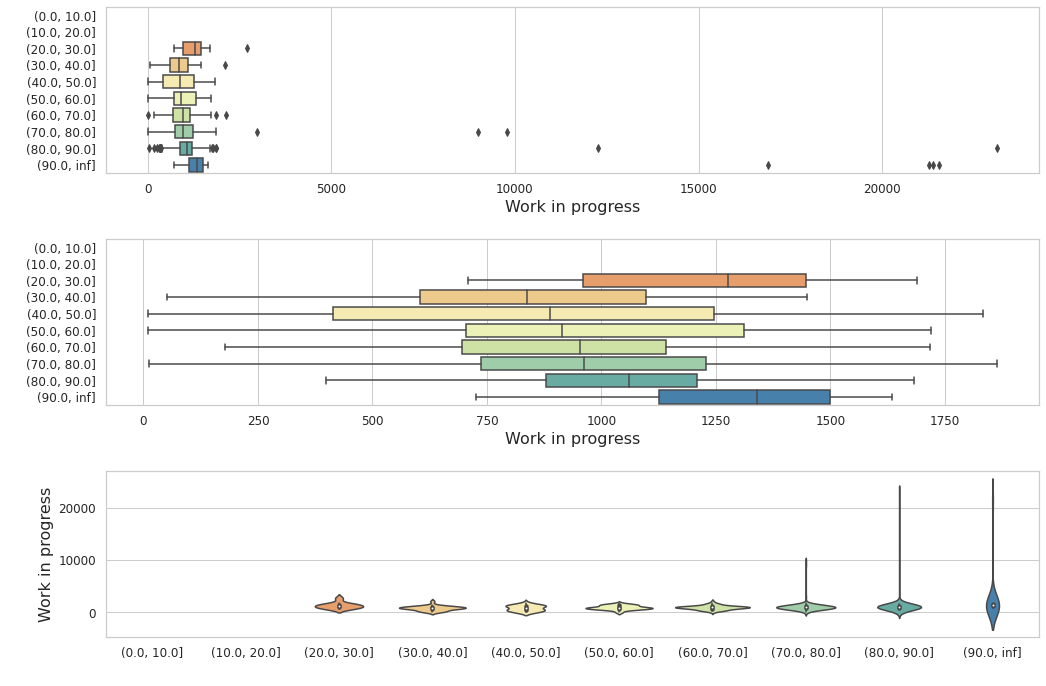

In [ ]:
fig, (ax1, ax2, ax3)= plt.subplots(3,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="wip",
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Work in progress", fontsize=16) 
ax1.tick_params(labelsize=12)
sns.boxplot(y="productivity_labels",x="wip",
             palette = "Spectral",
            data=df, ax = ax2, showfliers=False)
ax2.set_ylabel(" ", fontsize=16) 
ax2.set_xlabel("Work in progress", fontsize=16) 
ax2.tick_params(labelsize=12)
sns.violinplot(x="productivity_labels",y="wip",
             palette = "Spectral",
            data=df, ax = ax3)
ax3.set_xlabel(" ", fontsize=16) 
ax3.set_ylabel("Work in progress", fontsize=16) 
ax3.tick_params(labelsize=12)
fig.tight_layout(pad=2.0)
plt.show()

## Over time - Productivity relation

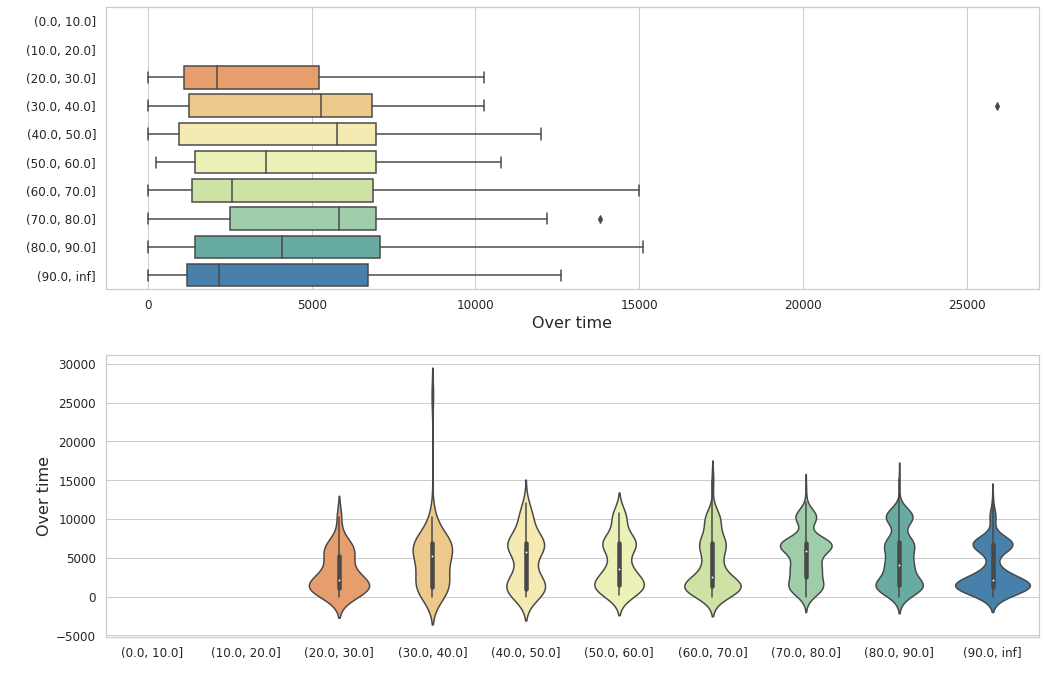

In [ ]:
fig, (ax1, ax2)= plt.subplots(2,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="over_time",
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Over time", fontsize=16) 
ax1.tick_params(labelsize=12)
sns.violinplot(x="productivity_labels",y="over_time",
             palette = "Spectral",
            data=df, ax = ax2)
ax2.set_xlabel(" ", fontsize=16) 
ax2.set_ylabel("Over time", fontsize=16) 
ax2.tick_params(labelsize=12)
fig.tight_layout(pad=2.0)
plt.show()

## Incentive - Productivity relation

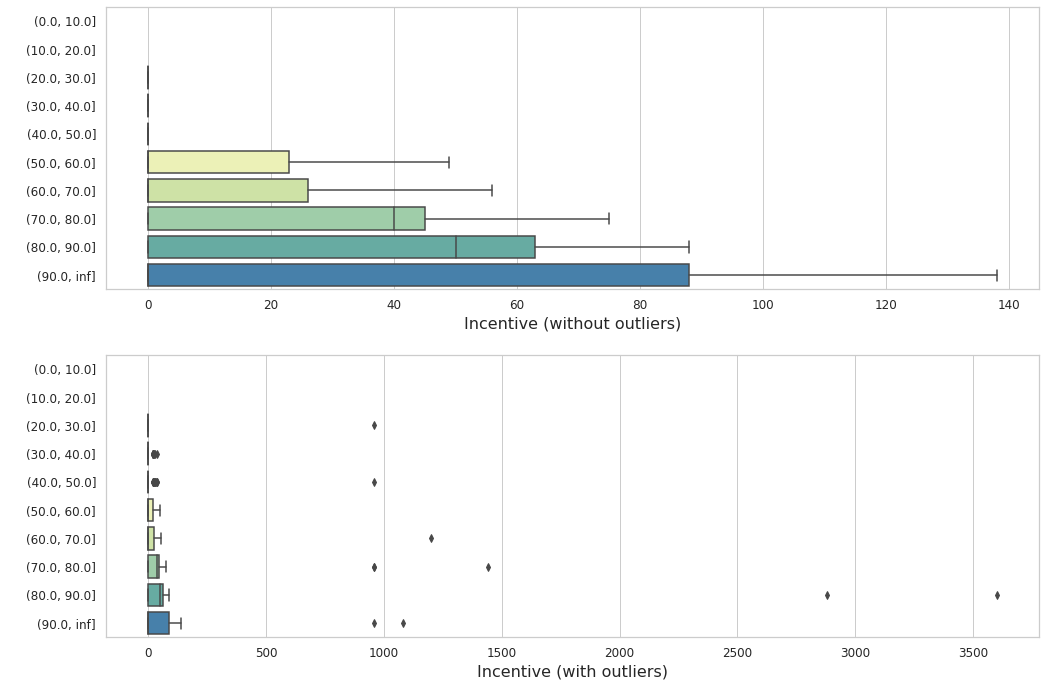

In [ ]:
fig, (ax1, ax2)= plt.subplots(2,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="incentive",
             palette = "Spectral",
            data=df, ax = ax1, showfliers=False)
ax1.set_ylabel(" ", fontsize=16) 
ax1.tick_params(labelsize=12)
ax1.set_xlabel("Incentive (without outliers)", fontsize=16) 
sns.boxplot(y="productivity_labels",x="incentive",
             palette = "Spectral",
            data=df, ax = ax2)
ax2.set_xlabel("Incentive (with outliers)", fontsize=16) 
ax2.tick_params(labelsize=12)
ax2.set_ylabel(" ", fontsize=16) 
fig.tight_layout(pad=2.0)

plt.show()

## Idle men - Production relation

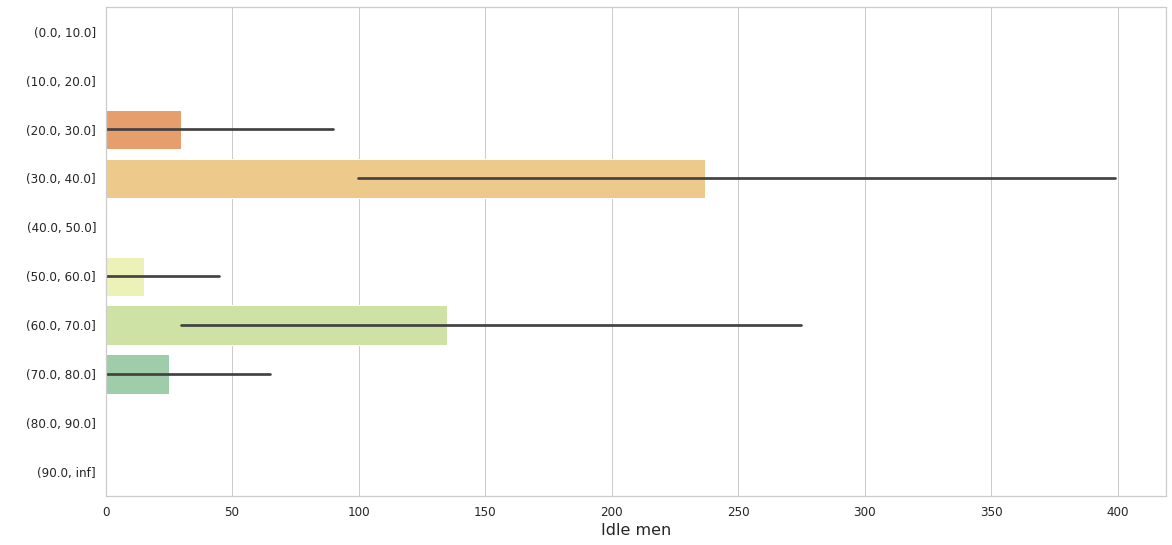

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(19,9))
sns.set(style="whitegrid")
sns.barplot(y="productivity_labels",x="idle_men", estimator=sum,
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Idle men", fontsize=16) 
ax1.tick_params(labelsize=12)

plt.show()

## Idle time - Productivity

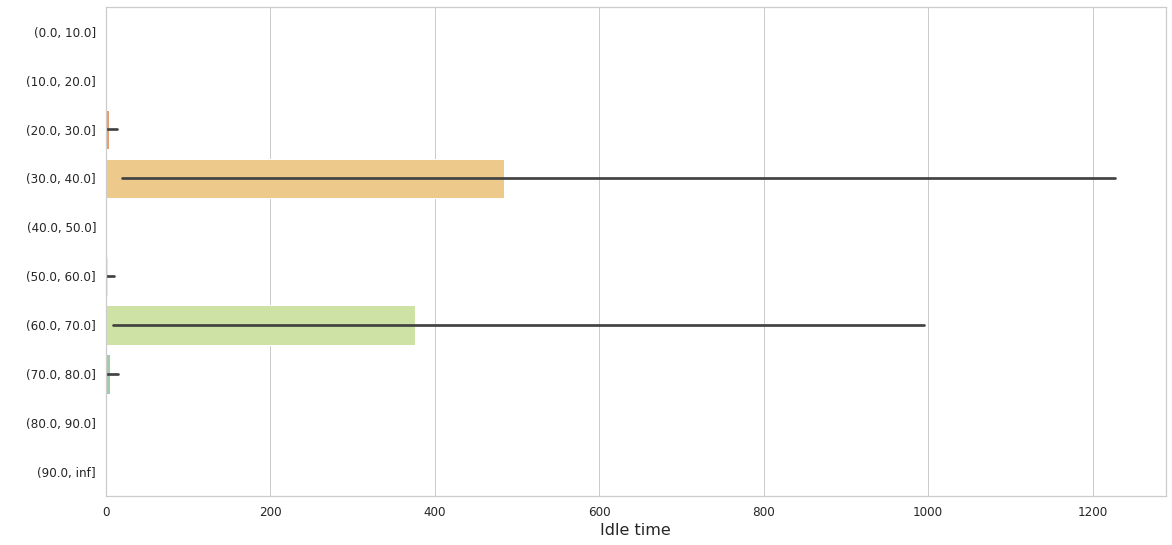

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(19,9))
sns.set(style="whitegrid")
sns.barplot(y="productivity_labels",x="idle_time", estimator=sum,
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Idle time", fontsize=16) 
ax1.tick_params(labelsize=12)

plt.show()

## no_of_style_change - Productivity

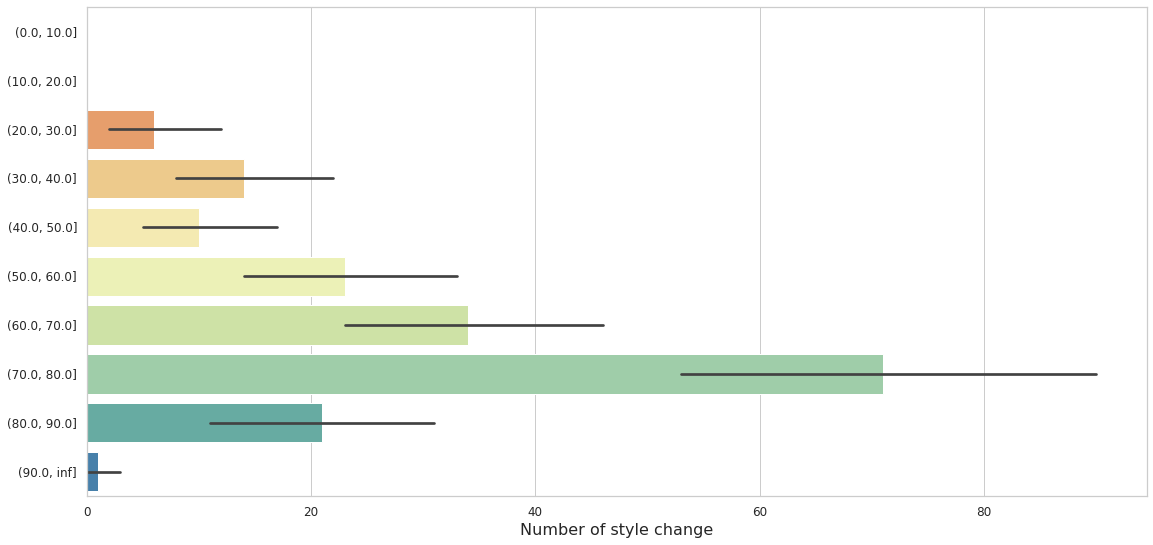

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(19,9))
sns.set(style="whitegrid")
sns.barplot(y="productivity_labels",x="no_of_style_change", estimator=sum,
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel("", fontsize=16) 
ax1.set_xlabel("Number of style change", fontsize=16) 
ax1.tick_params(labelsize=12)

plt.show()

## no_of_workers - Productivity

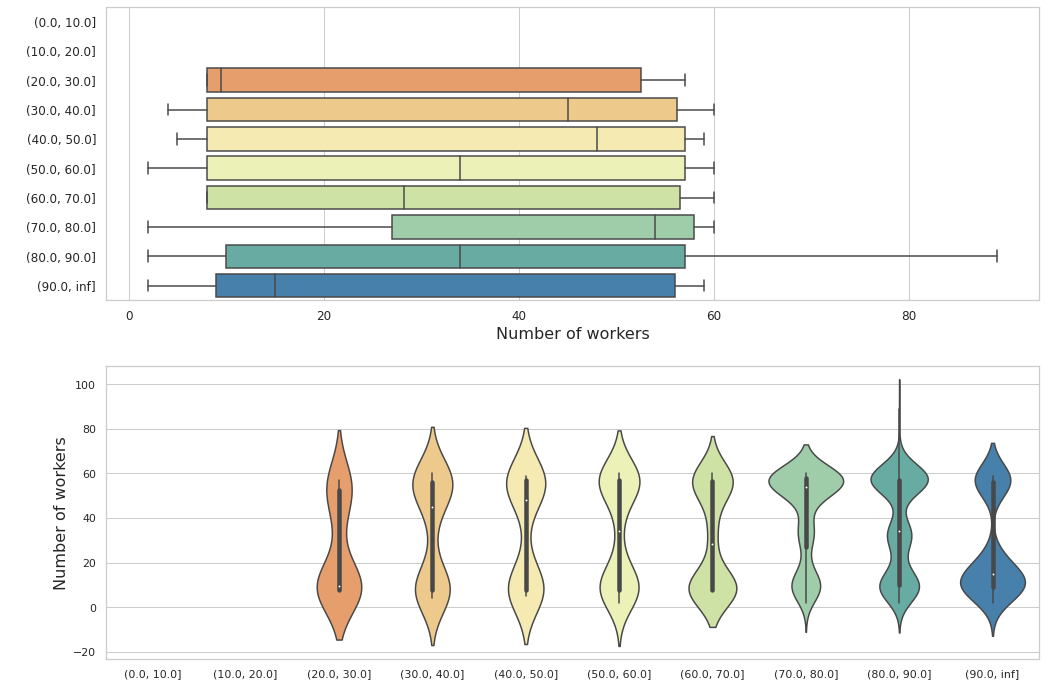

In [ ]:
fig, (ax1, ax2)= plt.subplots(2,1,figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(y="productivity_labels",x="no_of_workers",
             palette = "Spectral",
            data=df, ax = ax1)
ax1.set_ylabel(" ", fontsize=16) 
ax1.set_xlabel("Number of workers", fontsize=16) 
ax1.tick_params(labelsize=12)
sns.violinplot(x="productivity_labels",y="no_of_workers",
             palette = "Spectral",
            data=df, ax = ax2)
ax2.set_xlabel("", fontsize=16) 
ax2.set_ylabel("Number of workers", fontsize=16) 
ax1.tick_params(labelsize=12)
fig.tight_layout(pad=2.0)

plt.show()

## Null values

In [ ]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
productivity_labels        0
dtype: int64

In [ ]:
wip_null_mask = df['wip'].isnull()
df.loc[wip_null_mask, :].describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,506.000000,506.000000,506.000000,0.0,506.000000,506.000000,506.0,506.0,506.0,506.000000,506.000000
mean,6.298419,0.737352,3.887036,NaN,1917.154150,29.644269,0.0,0.0,0.0,10.252964,0.752951
std,3.470937,0.091512,0.594110,NaN,1776.698408,244.130042,0.0,0.0,0.0,4.007819,0.197021
min,1.000000,0.350000,2.900000,NaN,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.235795
25%,3.000000,0.700000,3.900000,NaN,960.000000,0.000000,0.0,0.0,0.0,8.000000,0.631606
50%,6.000000,0.750000,3.940000,NaN,1440.000000,0.000000,0.0,0.0,0.0,8.000000,0.805909
75%,9.000000,0.800000,4.150000,NaN,1920.000000,0.000000,0.0,0.0,0.0,11.750000,0.906364
max,12.000000,0.800000,5.130000,NaN,15000.000000,3600.000000,0.0,0.0,0.0,28.000000,1.120437


In [ ]:
df.loc[wip_null_mask, 'wip'] = df.loc[wip_null_mask, 'wip'].fillna(0)
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
productivity_labels      0
dtype: int64

## Standardize numerical attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
df['productivity_labels']  = df.productivity_labels.astype('str')
num_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df['team'] = '' + df['team'].astype(str)
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_labels
0,Quarter1,sweing,Thursday,8,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,1.178994,"(90.0, inf]"
1,Quarter1,finishing,Thursday,1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0.868096,"(80.0, 90.0]"
2,Quarter1,sweing,Thursday,11,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,0.375423,"(80.0, 90.0]"
3,Quarter1,sweing,Thursday,12,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,0.375423,"(80.0, 90.0]"
4,Quarter1,sweing,Thursday,6,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,0.374342,"(80.0, 90.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.208151,-1.111853,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.612090,"(60.0, 70.0]"
1193,Quarter2,finishing,Wednesday,8,-0.302835,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.627619,"(60.0, 70.0]"
1194,Quarter2,finishing,Wednesday,7,-0.813821,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.627619,"(60.0, 70.0]"
1195,Quarter2,finishing,Wednesday,9,0.208151,-1.111853,-0.453931,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788,-1.314120,"(50.0, 60.0]"


In [ ]:
y = df['productivity_labels']
X = df.drop(columns = ['productivity_labels', 'actual_productivity'])
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sweing,Thursday,8,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229
1,Quarter1,finishing,Thursday,1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
2,Quarter1,sweing,Thursday,11,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
3,Quarter1,sweing,Thursday,12,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
4,Quarter1,sweing,Thursday,6,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.208151,-1.111853,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1193,Quarter2,finishing,Wednesday,8,-0.302835,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1194,Quarter2,finishing,Wednesday,7,-0.813821,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
1195,Quarter2,finishing,Wednesday,9,0.208151,-1.111853,-0.453931,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788


## One-hot encoding

In [ ]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_')
df_concat = pd.concat([X, y], axis=1)
df_concat.iloc[:, :-1]

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_1,team_10,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
0,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.208151,-1.111853,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1193,-0.302835,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1194,-0.813821,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1195,0.208151,-1.111853,-0.453931,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## Outlier removal

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
newX2 = X[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
newy2 = y[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
newX2.shape
newy2.shape
newy2
X,y = newX2, newy2

## PCA

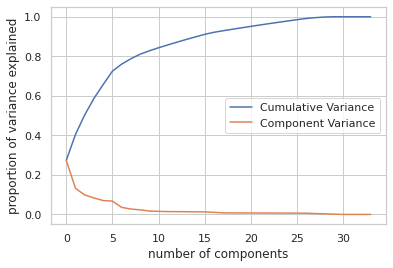

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_concat.iloc[:, :-1].values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('proportion of variance explained');
plt.legend(['Cumulative Variance', 'Component Variance'])

## Train test and split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
# test set must not be touched

In [ ]:
# helper function for plotting
def plotting(xdf,ydf,title):
    #xdf=pd.DataFrame(data=xdf, index=X.index)
    xdf=pd.DataFrame(data=xdf, index=X_train_val.index)
    xdf=xdf.iloc[:,0:2]
    data=pd.concat((xdf,ydf),axis=1)
    data=data.rename(columns={0:'first',1:'second'})
    sns.lmplot(data=data,x='first',y='second',hue='productivity_labels',fit_reg=False)
    sns.set_style('darkgrid')
    plt.title(title)

## PCA representation

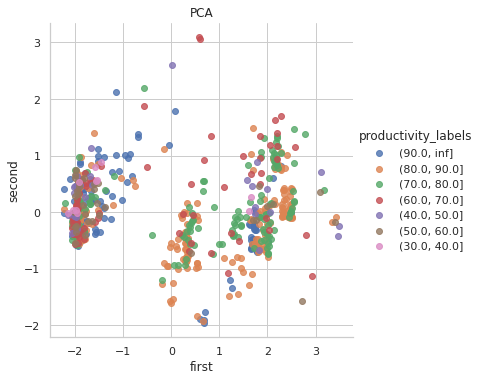

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=132,whiten=False)
train_pca=pca.fit_transform(X_train_val)
plotting(train_pca,y_train_val,'PCA')

## Truncated SVD representation

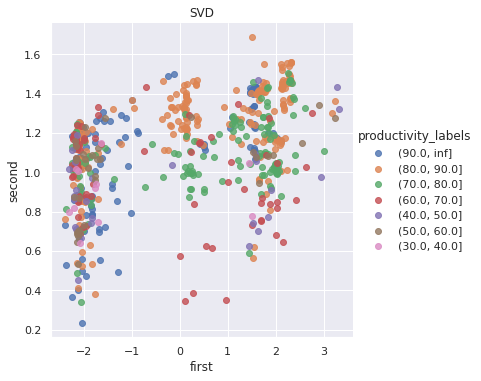

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized')
plotting(tsvd.fit_transform(X_train_val),y_train_val,'SVD')

## ICA representation

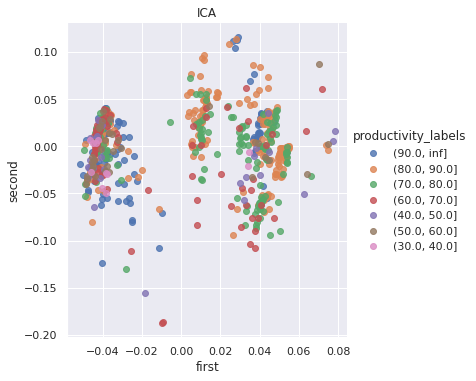

In [ ]:
from sklearn.decomposition import FastICA
fast_ica=FastICA(n_components=2, max_iter=50, algorithm='parallel')
plotting(fast_ica.fit_transform(X_train_val),y_train_val,'ICA')

## Variables for storing result

In [ ]:
f1_macro = []
f1_weighted = []
names = []

## Naive-Bayes classifier

In [ ]:
fast_ica=FastICA(n_components=12, max_iter=50, algorithm='parallel')
X_ica_train_val = fast_ica.fit_transform(X_train_val)
X_ica_test = fast_ica.transform(X_test)

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

bayes = GaussianNB()

sm = SMOTE(random_state=42)
X_aug, y_aug = sm.fit_resample(X_ica_train_val, y_train_val)
model = bayes.fit(X_aug, y_aug)
y_pred = model.predict(X_ica_test)

print(classification_report(y_test, y_pred))
names.append("Naive Bayes")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.07      0.60      0.12         5
(40.0, 50.0]       0.00      0.00      0.00        11
(50.0, 60.0]       0.15      0.21      0.18        14
(60.0, 70.0]       0.50      0.29      0.36        35
(70.0, 80.0]       0.69      0.41      0.52        61
(80.0, 90.0]       0.68      0.56      0.61        99
 (90.0, inf]       0.45      0.48      0.47        56

    accuracy                           0.44       281
   macro avg       0.36      0.36      0.32       281
weighted avg       0.55      0.44      0.48       281



In [ ]:
sns.pairplot(pd.DataFrame(X_ica_train_val), kind="kde")
plt.savefig(fname="18 Ica pairwise relation.png")

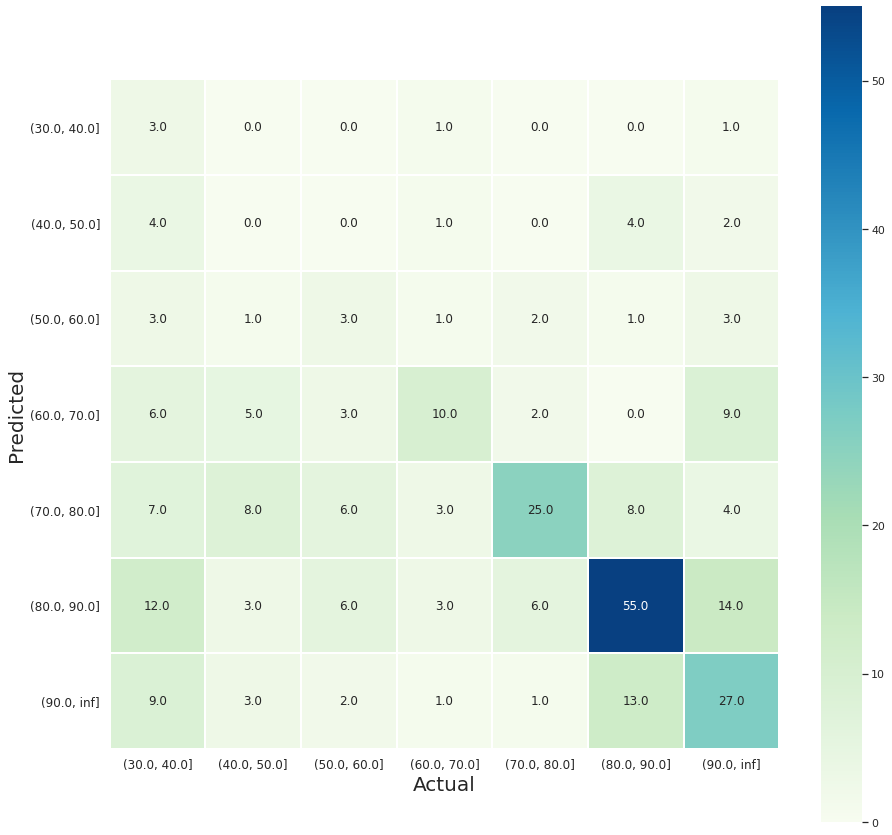

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Decision tree

In [ ]:
### Decision tree GridSearch
def DecisionTreeClassifierGridSearch(input_x, input_y,cv=5):
    
    dt_model = DecisionTreeClassifier()

    param_grid = {'max_depth':list(range(7,16,1)), 
                  'min_impurity_decrease': [0, .01, .03, .07, .09, .11],
                  'criterion': ['gini', 'entropy']}
    
    gridsearch = GridSearchCV(dt_model, param_grid, scoring='f1_macro', cv=cv)
    
    sm = SMOTE(random_state=42)
    input_x_aug, input_y_aug = sm.fit_resample(input_x, input_y)
    
    gridsearch.fit(input_x_aug, input_y_aug)
    best_parameters = gridsearch.best_params_  
    best_score = gridsearch.best_score_ 
    print("Best model configuration is:")
    print(best_parameters)
    print("Best model score is:")
    print(best_score)
  
DecisionTreeClassifierGridSearch(X_train_val, y_train_val)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=15)
sm = SMOTE()
X_aug, y_aug = sm.fit_resample(X_train_val, y_train_val)
model = decision_tree.fit(X_aug, y_aug)
y_pred = model.predict(X_test)

p, r, f1, support = precision_recall_fscore_support(y_test, y_pred)
print(classification_report(y_test, y_pred))

names.append("Decision Tree")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.00      0.00      0.00         5
(40.0, 50.0]       0.31      0.45      0.37        11
(50.0, 60.0]       0.16      0.21      0.18        14
(60.0, 70.0]       0.46      0.46      0.46        35
(70.0, 80.0]       0.55      0.56      0.55        61
(80.0, 90.0]       0.68      0.64      0.66        99
 (90.0, inf]       0.62      0.57      0.59        56

    accuracy                           0.54       281
   macro avg       0.40      0.41      0.40       281
weighted avg       0.56      0.54      0.55       281



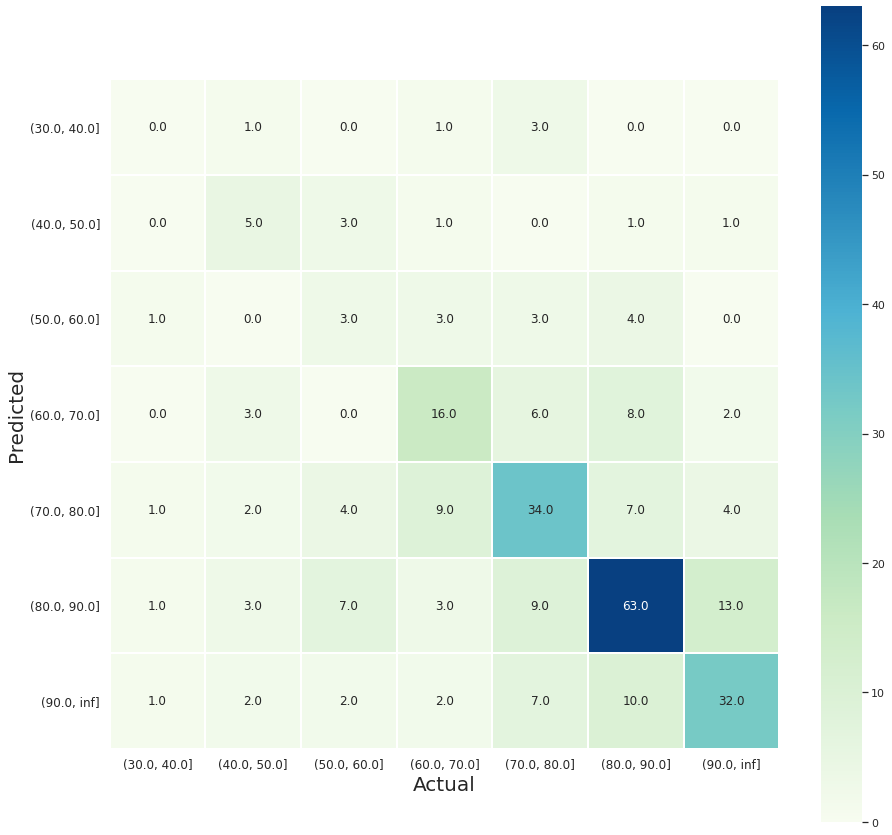

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Random Forest

In [ ]:
### Random Forest GridSearch
def RandomForestClassifierGridSearch(input_x, input_y,cv=5):
    
    rf_model = RandomForestClassifier()

    param_grid = {'max_depth':list(range(7,23,1)), 
                  'n_estimators':[100, 200, 300, 400, 500],
                  'criterion': ['gini', 'entropy'],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'class_weight':['balanced', 'balanced_subsample'],
                  }
    
    gridsearch = GridSearchCV(rf_model, param_grid, scoring='f1_macro', cv=cv)

    sm = SMOTE(random_state=42)
    input_x_aug, input_y_aug = sm.fit_resample(input_x, input_y)
    
    gridsearch.fit(input_x_aug, input_y_aug)
    best_parameters = gridsearch.best_params_  
    best_score = gridsearch.best_score_ 
    print("Best model configuration is:")
    print(best_parameters)
    print("Best model score is:")
    print(best_score)
    
RandomForestClassifierGridSearch(X_train_val, y_train_val)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

random_forest_clf = RandomForestClassifier(n_estimators=200, max_depth=14, max_features = 'sqrt', criterion = 'gini', class_weight='balanced')
sm = SMOTE()
X_aug, y_aug = sm.fit_resample(X_train_val, y_train_val)
model = random_forest_clf.fit(X_aug, y_aug)
y_pred = model.predict(X_test)

p_svm, r_svm, f1_svm, support_svm = precision_recall_fscore_support(y_test, y_pred)
print(classification_report(y_test, y_pred))

names.append("Random forest")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.40      0.40      0.40         5
(40.0, 50.0]       0.27      0.27      0.27        11
(50.0, 60.0]       0.18      0.21      0.19        14
(60.0, 70.0]       0.50      0.63      0.56        35
(70.0, 80.0]       0.76      0.62      0.68        61
(80.0, 90.0]       0.78      0.66      0.71        99
 (90.0, inf]       0.59      0.75      0.66        56

    accuracy                           0.62       281
   macro avg       0.50      0.51      0.50       281
weighted avg       0.65      0.62      0.63       281



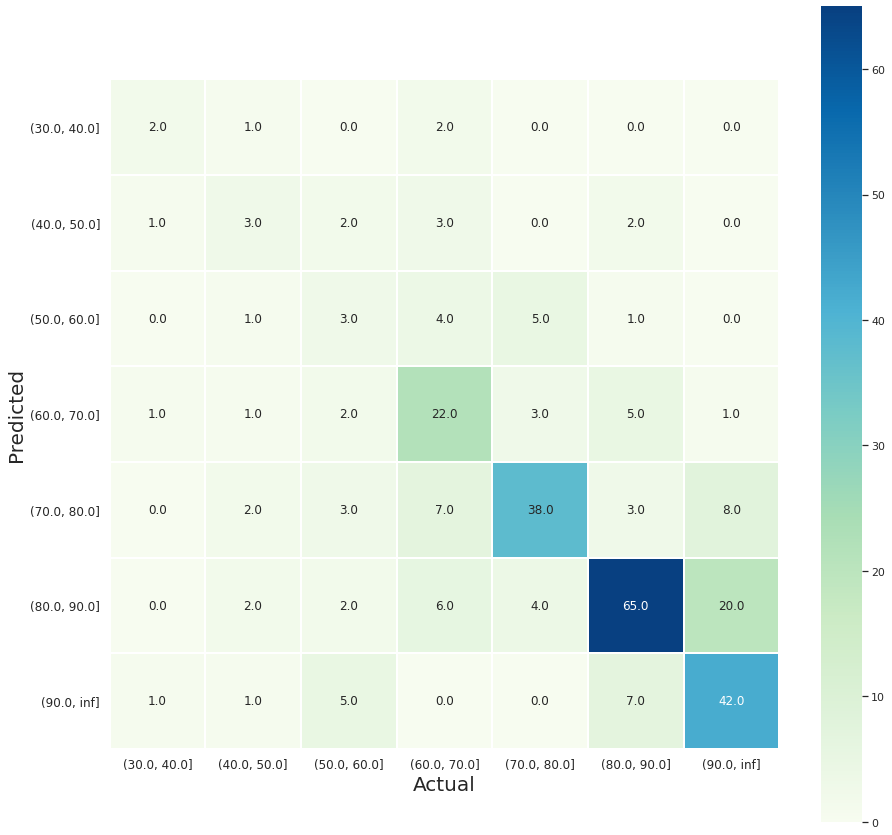

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Support Vector Machine

In [ ]:
### Support Vector Machine GridSearch
def SVMClassifierGridSearch(input_x, input_y,cv=5):
    
    model = svm.SVC()

    param_grid = {'C':[0.01, 0.1, 0.2, 0.5, 0.7, 1, 2], 
                  'kernel':['linear', 'rbf', 'sigmoid'],
                  'class_weight': [None, 'balanced'],
                  'decision_function_shape':['ovo', 'ovr']
                  }
    
    gridsearch = GridSearchCV(model, param_grid, scoring='f1_macro', cv=cv)

    sm = SMOTE(random_state=42)
    input_x_aug, input_y_aug = sm.fit_resample(input_x, input_y)
    
    gridsearch.fit(input_x_aug, input_y_aug)
    best_parameters = gridsearch.best_params_  
    best_score = gridsearch.best_score_ 
    print("Best model configuration is:")
    print(best_parameters)
    print("Best model score is:")
    print(best_score)
    
SVMClassifierGridSearch(X_train_val, y_train_val)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

svm_classifier = svm.SVC(C=2, class_weight='balanced', decision_function_shape='ovo', kernel='rbf')
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_val, y_train_val)
model = svm_classifier.fit(X_res, y_res)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

names.append("Support vector machine")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.30      0.60      0.40         5
(40.0, 50.0]       0.20      0.27      0.23        11
(50.0, 60.0]       0.15      0.21      0.18        14
(60.0, 70.0]       0.36      0.57      0.44        35
(70.0, 80.0]       0.67      0.51      0.58        61
(80.0, 90.0]       0.77      0.58      0.66        99
 (90.0, inf]       0.60      0.64      0.62        56

    accuracy                           0.54       281
   macro avg       0.44      0.48      0.44       281
weighted avg       0.60      0.54      0.56       281



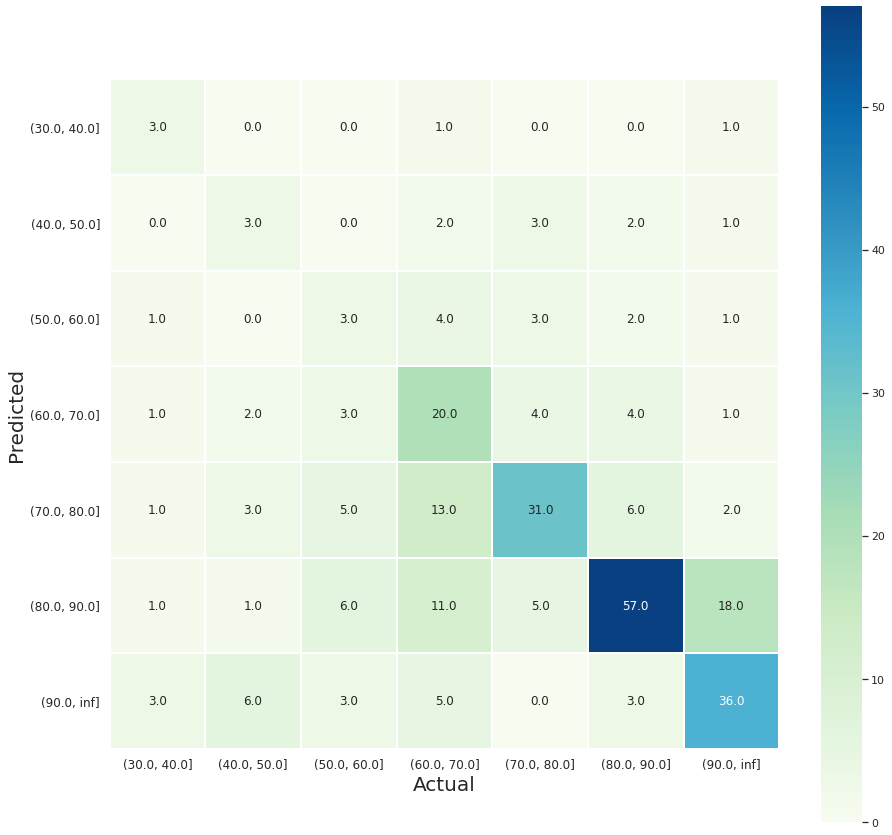

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Logistic regression

In [ ]:
### Logistic regression GridSearch
def logisticRegressionGridSearch(input_x, input_y,cv=5):
    
    model = LogisticRegression()

    param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'class_weight': [None, 'balanced'],
                  'multi_class': ['auto', 'ovr', 'multinomial']
                  }
    
    gridsearch = GridSearchCV(model, param_grid, scoring='f1_macro', cv=cv)

    sm = SMOTE(random_state=42)
    input_x_aug, input_y_aug = sm.fit_resample(input_x, input_y)
    
    gridsearch.fit(input_x_aug, input_y_aug)
    best_parameters = gridsearch.best_params_  
    best_score = gridsearch.best_score_ 
    print("Best model configuration is:")
    print(best_parameters)
    print("Best model score is:")
    print(best_score)
    
logisticRegressionGridSearch(X_train_val, y_train_val)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

model = LogisticRegression(multi_class='auto', class_weight='balanced', solver='newton-cg')

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_val, y_train_val)
model = model.fit(X_res, y_res)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

names.append("Logistic regression")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.08      0.40      0.13         5
(40.0, 50.0]       0.14      0.27      0.19        11
(50.0, 60.0]       0.12      0.29      0.17        14
(60.0, 70.0]       0.37      0.29      0.32        35
(70.0, 80.0]       0.54      0.46      0.50        61
(80.0, 90.0]       0.72      0.48      0.58        99
 (90.0, inf]       0.61      0.61      0.61        56

    accuracy                           0.46       281
   macro avg       0.37      0.40      0.36       281
weighted avg       0.55      0.46      0.49       281



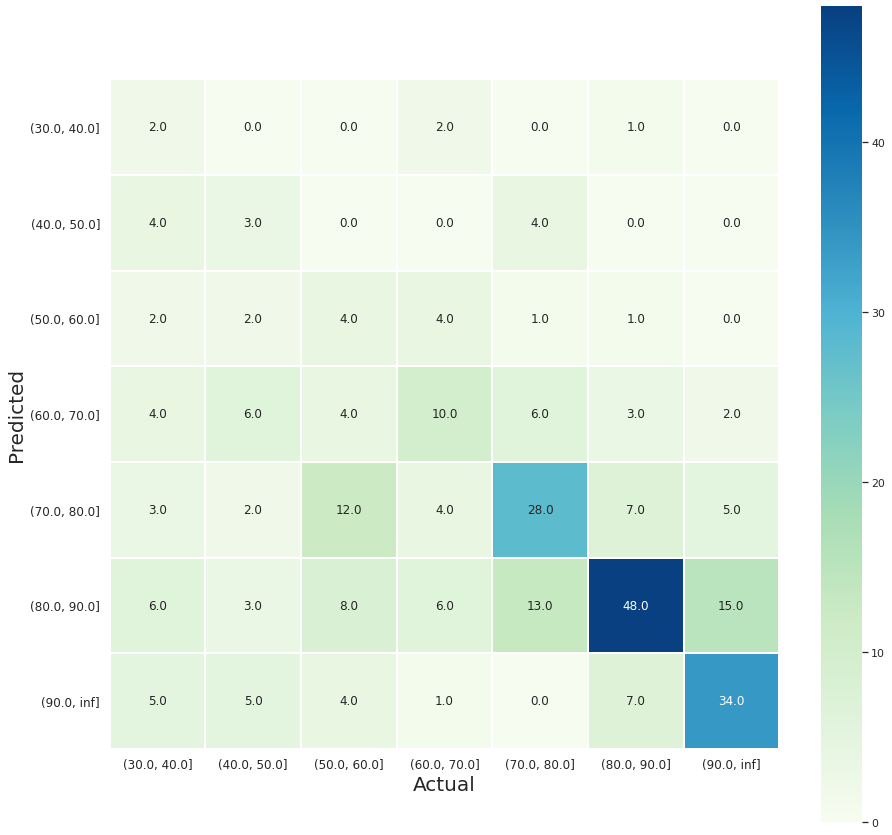

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## KNN

In [ ]:
### Knn GridSearch
def knnGridSearch(input_x, input_y,cv=5):
    
    model = KNeighborsClassifier()

    param_grid = {'n_neighbors': list(range(1,30,1)),
                  'weights': ['uniform', 'distance']
                  }
    
    gridsearch = GridSearchCV(model, param_grid, scoring='f1_macro', cv=cv)

    sm = SMOTE(random_state=42)
    input_x_aug, input_y_aug = sm.fit_resample(input_x, input_y)
    
    gridsearch.fit(input_x_aug, input_y_aug)
    best_parameters = gridsearch.best_params_  
    best_score = gridsearch.best_score_ 
    print("Best model configuration is:")
    print(best_parameters)
    print("Best model score is:")
    print(best_score)
    
knnGridSearch(X_train_val, y_train_val)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

model = KNeighborsClassifier(n_neighbors=2, weights='distance')

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_val, y_train_val)
model = model.fit(X_res, y_res)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

names.append("K nearest neighbors")
f1_macro.append(f1_score(y_test, y_pred, average='macro'))
f1_weighted.append(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

(30.0, 40.0]       0.20      0.80      0.32         5
(40.0, 50.0]       0.05      0.09      0.06        11
(50.0, 60.0]       0.12      0.21      0.16        14
(60.0, 70.0]       0.28      0.37      0.32        35
(70.0, 80.0]       0.30      0.25      0.27        61
(80.0, 90.0]       0.59      0.38      0.47        99
 (90.0, inf]       0.35      0.36      0.35        56

    accuracy                           0.33       281
   macro avg       0.27      0.35      0.28       281
weighted avg       0.39      0.33      0.35       281



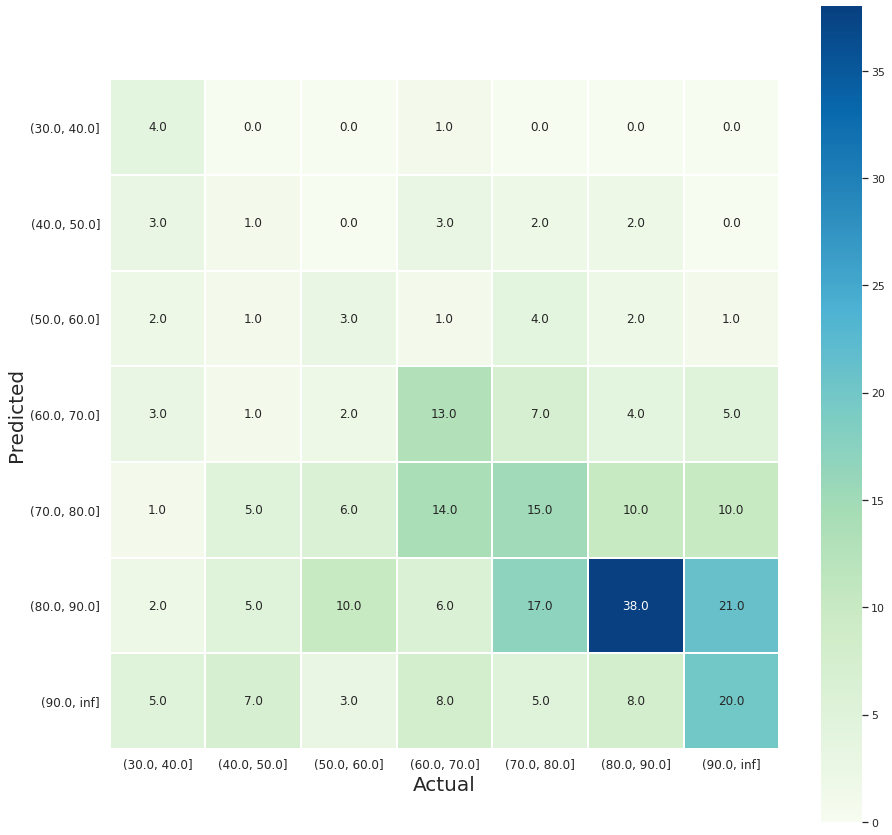

In [ ]:
fig, (ax1)= plt.subplots(1,1,figsize=(15,15))
unique_label = np.unique([y_test, y_pred])
c_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
ax = sns.heatmap(c_matrix, linewidths =1, annot=True, fmt='.1f', square = True, cmap="GnBu")
ax.set_ylabel("Predicted", fontsize=20) 
ax.set_xlabel("Actual", fontsize=20)
ax.set_yticklabels(labels = unique_label, rotation=0)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

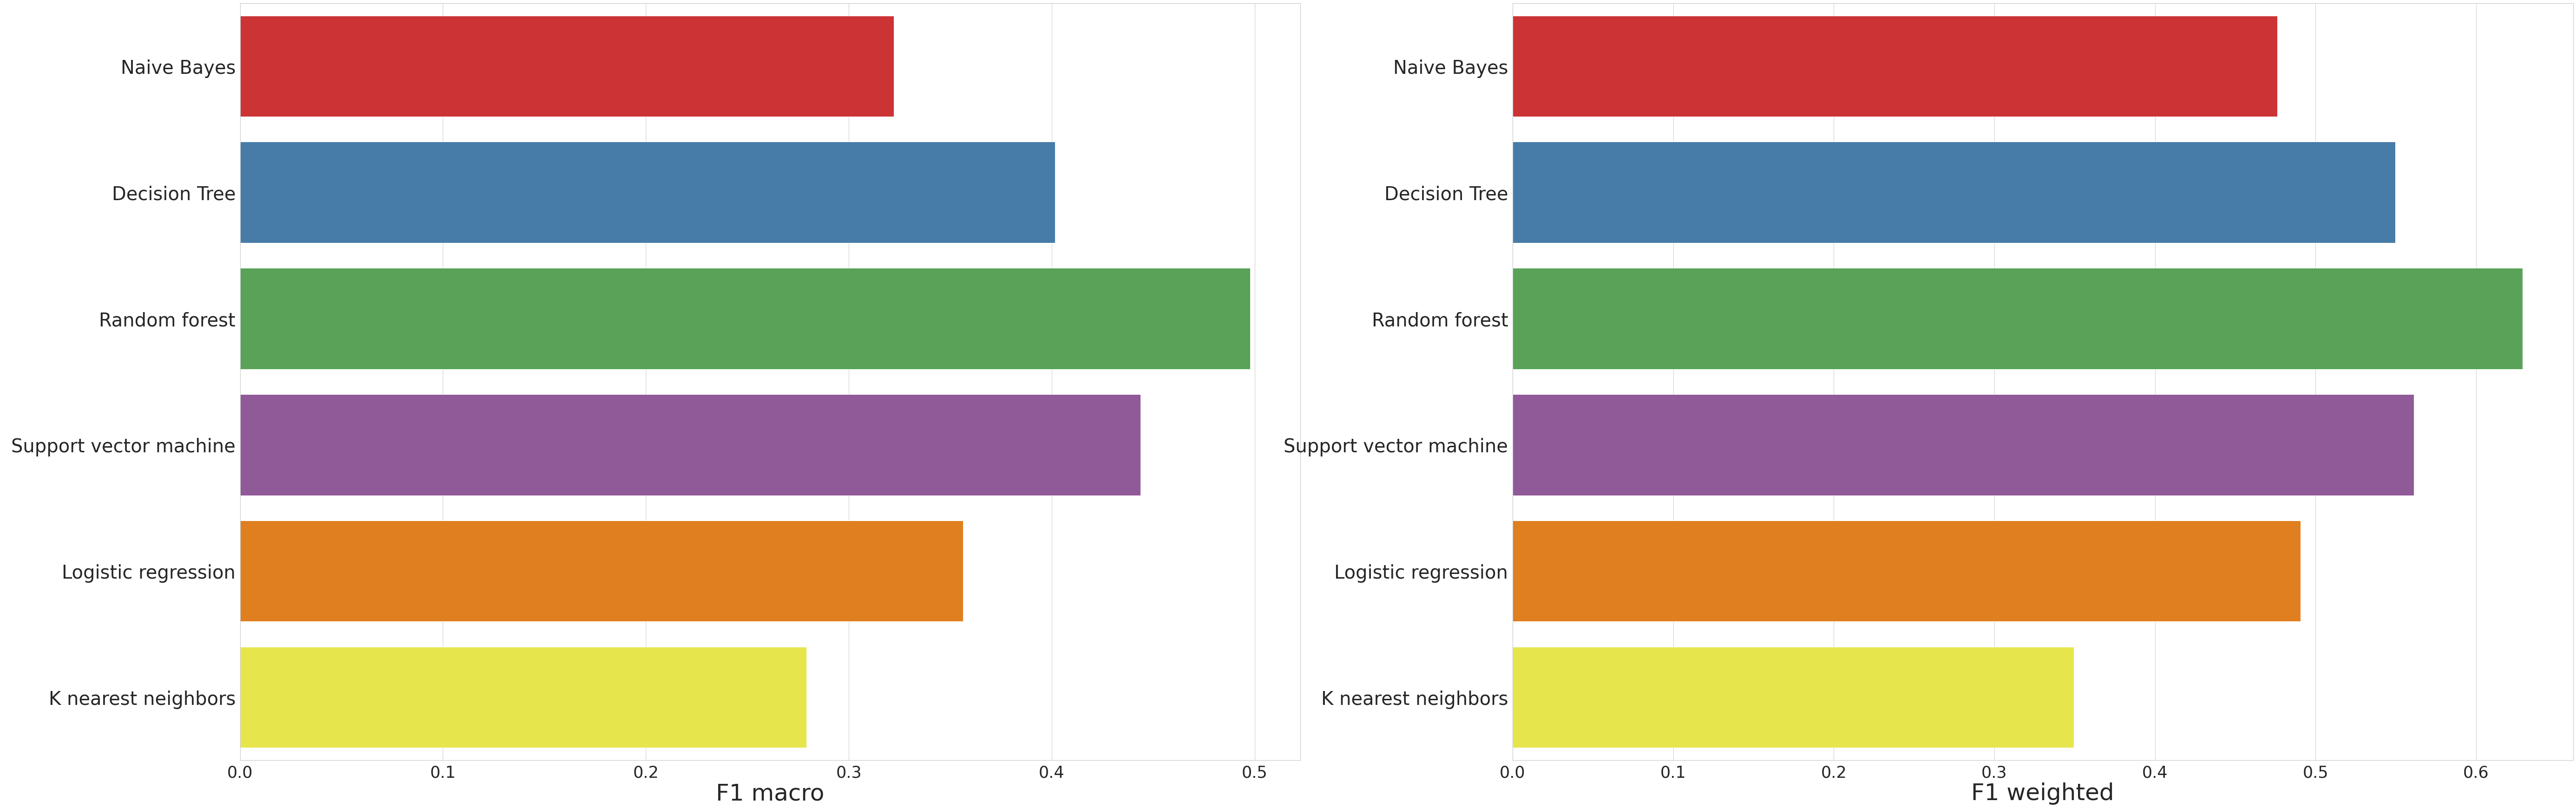

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(90,30))
sns.set(style="whitegrid")
ax = sns.barplot(y=names,x=f1_macro,palette='Set1', ax = ax1)
ax1.set_ylabel(" ") 
ax1.set_xlabel("F1 macro", fontsize=50) 
ax1.tick_params(labelsize=35)
ax1.set_yticklabels(labels=names, fontsize=40)
ax = sns.barplot(y=names,x=f1_weighted,palette='Set1', ax = ax2)
ax2.set_ylabel(" ") 
ax2.set_xlabel("F1 weighted", fontsize=50) 
ax2.tick_params(labelsize=35)
ax2.set_yticklabels(labels=names, fontsize=40)
plt.savefig(fname="39 conclusion.png")